 
This notebook: inverts for disp rates in cm/yr with following criteria: no topo corrections at all, phase jump cutoff based on HP phase (unwrapped unfilt igram - unwrapped filt igram at a pixel) double finite difference. 
<br>
<br>

This notebook was copied and edited on 2-21-24.

***

In [1]:
# import stuff
import os,sys
import glob
import pandas
from osgeo import gdal
import datetime 
from datetime import datetime
from datetime import timedelta
from dateutil import parser
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
%matplotlib  widget

# Need this function to convert datetime objects to decimal years. Got this off of stackexchange. 
def datetime2year(dt): 
    year_part = dt - datetime(year=dt.year, month=1, day=1)
    year_length = (
        datetime(year=dt.year + 1, month=1, day=1)
        - datetime(year=dt.year, month=1, day=1)
    )
    return dt.year + year_part / year_length

Do we want to run this notebook with filtered/unfiltered data? <br>
What about referenced to average phase value, reference box, or reference pixels chosen by "chooseing_reference_pixels.ipynb"

In [2]:
# choose one: 'filt' or 'unfilt'
key1 = 'unfilt'
# choose one: 'avg_val' or 'ref_box' or 'ref_pix'
key2 = 'ref_pix'

Grab dates of SLCs/igrams and calculate number of SLCs (nd) and igrams (numIgrams).

In [3]:
# this one is to pick out the dates 
datesDir = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/'
# shape of unwrapped igrams
# dx = 3000
# dy = 750

# larger cropped area with western mountains 
dx = 4000
dy = 1100

# load in dates, make sure they are in order
dates = [os.path.basename(x) for x in glob.glob(datesDir+"SLC_vh/2*")]; dates = sorted(dates)
nd = len(dates); numIgrams = nd-1

Load in the mask for reference pixels chosen with various criteria. 

Reference pixel mask loaded.


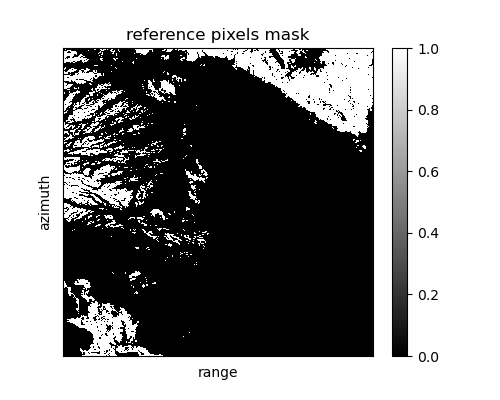

In [4]:
# load reference pixels mask 
#maskFile = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/cropped_northern_shore_LS_for_unwrapping/masks/ref_pixels_mask.r4'
maskFile = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/cropped_LS_with_western_mtns/masks/ref_pixels_mask.r4'
ds = gdal.Open(maskFile,gdal.GA_ReadOnly)
ref_mask = ds.GetRasterBand(1).ReadAsArray(0,0,dx,dy)
mask_y,mask_x = np.nonzero(ref_mask)
print('Reference pixel mask loaded.')

plt.figure(figsize=(5,4))
plt.imshow(ref_mask, cmap='gray',aspect='auto',interpolation='nearest',vmin=0,vmax=1.0); plt.xlim(dx,0); plt.xticks([]); plt.yticks([])
plt.xlabel('range'); plt.ylabel('azimuth'); plt.title('reference pixels mask') 
plt.colorbar()
plt.show()

Read in each unfilt, unwrapped igram and calculate the average phase value over all reference pixels and save it into array. 

In [5]:
# set the driver first, only do once.
driver=gdal.GetDriverByName('ISCE')
avg_ref_vals = np.ndarray((numIgrams,),dtype='float')
# filt_ref_vals = np.ndarray((numIgrams,),dtype='float')

# igramsDir is where the cropped, unwrapped igrams are
igramsDir = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/cropped_LS_with_western_mtns/'+key1+'_unwrapped/'
# filtDir   = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/cropped_LS_with_western_mtns/filt_unwrapped/'

for i in range(numIgrams): # numIgrams if doing all of them at once
    igramFile = igramsDir+dates[i]+'_'+dates[i+1]+'_'+key1+'.unw'
    ds = gdal.Open(igramFile,gdal.GA_ReadOnly)
    temp_igram = ds.GetRasterBand(1).ReadAsArray(0,0,dx,dy)
    # just take the average ref pixel phase value and save it. 
    avg_ref_vals[i] = np.mean(temp_igram[mask_y,mask_x])

    # filtFile = filtDir+dates[i]+'_'+dates[i+1]+'_filt.unw'
    # ds = gdal.Open(filtFile,gdal.GA_ReadOnly)
    # filt_igram = ds.GetRasterBand(1).ReadAsArray(0,0,dx,dy)
    # filt_ref_vals[i] = np.mean(filt_igram[mask_y,mask_x])

    print('i: '+str(i)+'\tavg_ref_val: '+str('%.4f' % avg_ref_vals[i]))
    # print('i: '+str(i)+'\tavg_ref_val: '+str('%.4f' % avg_ref_vals[i])+'\tfilt_ref_val: '+str('%.4f' % filt_ref_vals[i]))
print('Avg value of ref pixels calculated for all '+key1+' igrams.')

# save space/RAM and clean up these variables now. 
del igramFile, ds, temp_igram

i: 0	avg_ref_val: 2.1844
i: 1	avg_ref_val: 5.4311
i: 2	avg_ref_val: 4.3530
i: 3	avg_ref_val: 3.1144
i: 4	avg_ref_val: 3.7690
i: 5	avg_ref_val: -5.0784
i: 6	avg_ref_val: 9.6673
i: 7	avg_ref_val: 1.4375
i: 8	avg_ref_val: 3.8558
i: 9	avg_ref_val: -0.5668
i: 10	avg_ref_val: 4.0991
i: 11	avg_ref_val: 5.7583
i: 12	avg_ref_val: 6.6010
i: 13	avg_ref_val: 2.3536
i: 14	avg_ref_val: 5.3715
i: 15	avg_ref_val: 3.7643
i: 16	avg_ref_val: 6.7008
i: 17	avg_ref_val: 5.4200
i: 18	avg_ref_val: 0.5290
i: 19	avg_ref_val: 1.5824
i: 20	avg_ref_val: 2.0615
i: 21	avg_ref_val: 0.6391
i: 22	avg_ref_val: 6.1663
i: 23	avg_ref_val: 6.0260
i: 24	avg_ref_val: 1.0141
i: 25	avg_ref_val: 0.3082
i: 26	avg_ref_val: 6.8330
i: 27	avg_ref_val: 4.6757
i: 28	avg_ref_val: 4.6061
i: 29	avg_ref_val: 2.0071
i: 30	avg_ref_val: -0.9359
i: 31	avg_ref_val: 2.9302
i: 32	avg_ref_val: 4.2917
i: 33	avg_ref_val: 0.7548
i: 34	avg_ref_val: 3.9917
i: 35	avg_ref_val: 4.5384
i: 36	avg_ref_val: 10.1166
i: 37	avg_ref_val: -2.2232
i: 38	avg_ref_val

Pull out dates in order to calculate disp rates over time.

In [6]:
# dates is a list of strings, convert strings to datetime objects 
slc_dates=[]
for i in range(0,len(dates)):
    slc_dates.append(datetime.strptime(str(dates[i]).replace('\n',''), '%Y%m%d'))
# convert to floats 
slc_dates_floats = np.ndarray((len(slc_dates),1),dtype='float')
for i in range(len(slc_dates)):
    slc_dates_floats[i] = datetime2year(slc_dates[i]) # now an array of floats in years
# take numIgrams and pull out the igram_dates, corresponding to the second/last day of each igram
igram_dates = slc_dates[1::] # using the second SLC date per Rowena's suggestion
dt1 = np.diff(slc_dates) # calculate dt between slcs, these are now timedelta objects
# convert to floats 
dt_all = np.zeros([len(dt1),1])
for i in range(len(dt_all)):
    dt_all[i] = dt1[i].days #/365.25 # dt is now an array of floats (years btw slc acquisitions)
print('slc_dates: '+str(np.shape(slc_dates)[0]))
print('igram_dates: '+str(np.shape(igram_dates)[0]))

slc_dates: 211
igram_dates: 210


Find which dates I need to separate the time series into to fit slopes for each pixel.

In [7]:
start_indices = [0,47,108,147,0,0,107]
end_indices = [46,107,146,numIgrams,88,numIgrams,153]
num_intervals = len(start_indices)

for i in range(num_intervals):
    print('interval '+str(i)+': '+str(dates[start_indices[i]]+' - '+str(dates[end_indices[i]])))
print('\ntotal duration of this study: '+str((igram_dates[-1]-igram_dates[0]).days/365.25)+' years')

interval 0: 20170510 - 20181125
interval 1: 20181207 - 20200412
interval 2: 20200418 - 20201208
interval 3: 20201214 - 20220108
interval 4: 20170510 - 20191220
interval 5: 20170510 - 20220108
interval 6: 20200412 - 20210119

total duration of this study: 4.632443531827516 years


In [8]:
# single pixel coordinate for comparison of no phase cutoff inversion vs phase cutoff inversion
x = 3824
y = 445
'''
# these are for figure showing two pixels, close together, with very different rates. 
# y2 = 443
# x2 = 3826
y2 = 445
x2 = 3824

y1 = 448
x1 = 3835


# choose an y,x coordinate, which pixel? 
y = y2
x = x2

# these are for figure showing two pixels, close together, with very different rates. 
# y2 = 443
# x2 = 3826
y2 = 445
x2 = 3824

y1 = 448
x1 = 3835


# choose an y,x coordinate, which pixel? 
y = 458; #y = 600
x = 3525; 

# y = 436
# x = 3677

# y=650
# x=1910

y=670
x=2610

# y=452 # a big jump but not really unwrap error, just maybe permanent defo 
# x=3843

'''

'\n# these are for figure showing two pixels, close together, with very different rates. \n# y2 = 443\n# x2 = 3826\ny2 = 445\nx2 = 3824\n\ny1 = 448\nx1 = 3835\n\n\n# choose an y,x coordinate, which pixel? \ny = y2\nx = x2\n\n# these are for figure showing two pixels, close together, with very different rates. \n# y2 = 443\n# x2 = 3826\ny2 = 445\nx2 = 3824\n\ny1 = 448\nx1 = 3835\n\n\n# choose an y,x coordinate, which pixel? \ny = 458; #y = 600\nx = 3525; \n\n# y = 436\n# x = 3677\n\n# y=650\n# x=1910\n\ny=670\nx=2610\n\n# y=452 # a big jump but not really unwrap error, just maybe permanent defo \n# x=3843\n\n'

Do one pixel for one interval and plot the time series to check if the weighted inversion is working.

210 dates in interval 5.


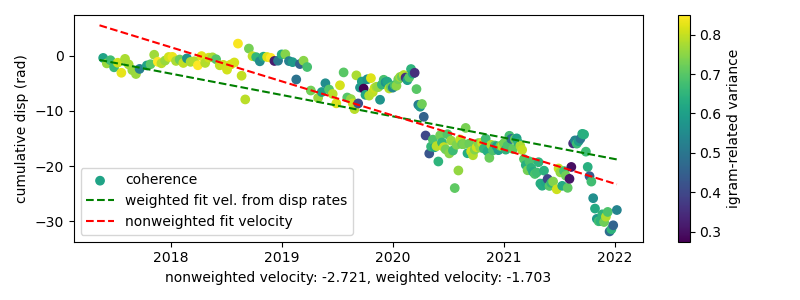

nonweighted velocity: 		-6.165689821963575 rad/yr 	-2.7214276969180693 cm/yr
weighted vel from disp rates: 	-3.8577396605043894 rad/yr 	-1.7027388439486077 cm/yr
RMSE to weighted fit: 		2.083187196563389 rad/yr 	0.9194824096401333 cm/yr


In [9]:
driver=gdal.GetDriverByName('ISCE')
# if testing with a large disp value with bad coherence, set this key to 'test'
key = 'notest'
# which interval?
j = 5

# set the directories 
igramsDir =  '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/cropped_LS_with_western_mtns/'+key1+'_unwrapped/'
filtDir   =  '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/cropped_LS_with_western_mtns/filt_unwrapped/'
cohDir =     '/data/ocp4/LagunaSalada/Data_and_Figs/2_coherence/coh_LS_with_western_mtns_all_igrams/'
saveDir =    '/data/ocp4/LagunaSalada/Data_and_Figs/11_unwrapped_igrams/disp_rate_maps_with_western_mtns/'

# pick out indices from the interval (interval j)
interval_length = end_indices[j]-start_indices[j]
print(str(interval_length)+' dates in interval '+str(j)+'.')
# set up temp arrays for the row I'm extracting each time 
temp_phs = np.ndarray((interval_length,),dtype='float')
temp_coh = np.ndarray((interval_length,),dtype='float')
temp_filt= np.ndarray((interval_length,),dtype='float')

# load in phase values for single pixel, correct them (subtract avg ref value), load coherence for that pixel too
for i in range(interval_length):
    #print(start_indices[j]+i)
    date1 = dates[start_indices[j]+i]
    date2 = dates[start_indices[j]+i+1]
    igramFile = igramsDir+date1+'_'+date2+'_'+key1+'.unw'
    ds = gdal.Open(igramFile,gdal.GA_ReadOnly)
    # only reading in one row at a time 
    temp_phs[i] = ds.GetRasterBand(1).ReadAsArray(x,y,1,1)[0,0]     # (startx,starty,dx,dy)  
    # correct based on avg ref values 
    temp_phs[i] = temp_phs[i] - avg_ref_vals[start_indices[j]+i]
    # read in the same row of data for the filtered unwrapped igram 
    filtFile = filtDir+date1+'_'+date2+'_filt.unw'
    ds = gdal.Open(filtFile,gdal.GA_ReadOnly)
    temp_filt[i] = ds.GetRasterBand(1).ReadAsArray(x,y,1,1)[0,0] 
    # correct based on filt ref vals
    #temp_filt[i] = temp_filt[i] - filt_ref_vals[start_indices[j]+i]
    # NEVERMIND use the same ref phase val as the unfilt igram.
    temp_filt[i] = temp_filt[i] - avg_ref_vals[start_indices[j]+i]
    # load one line of coherence files
    cohFile = 'coh_'+date1+'-'+date2+'.r4'
    ds = gdal.Open(cohDir+cohFile, gdal.GA_ReadOnly)
    # only reading in one row at a time
    temp_coh[i] = ds.GetRasterBand(1).ReadAsArray(x,y,1,1)[0,0] 
# times of SLCs in interval j
t = slc_dates_floats[start_indices[j]:end_indices[j]+1]     # first index is starting SLC, end index+1 is end SLC
t_datetime = slc_dates[start_indices[j]:end_indices[j]+1]   # so igram dates are t[1::], this line is for better plotting
# this is date-related/atmospheric noise (instead of coherence/std.dev.s/variances which are speckle/igram-related)
noise_diags = np.ones(interval_length)*1.0                  # ones on diagonal 
noise_off_diags = np.ones(interval_length-1)*(-0.5)         # -0.5 on off diagonals
# date/atm-related noise covariance matrix
covi = np.diag(noise_diags,0)+np.diag(noise_off_diags,-1) \
    +np.diag(noise_off_diags,1) 
# coherence at that pixel over the interval, use this to calc variance.
coh_at_pixel = temp_coh                                     # all dates, just the one pixel 

variances = (-2*np.log(coh_at_pixel))                       # got this formula from Rowena's cor_sigma_test.m file 
if key=='test':
    # OPTIONAL: make the Nth variance a HUGE number to test 
    variances[20] = 100.0
vars_diag = np.diag(variances,0)
# Combine date-related and igram-related noise into proper covariance matrix 
covi2 = covi + vars_diag                                    # account for noise in individual igrams, ~speckle (not associated w/ a date, 2 igrams)
icov = np.linalg.inv(covi2)                                 # inverse of covariance matrix
# Make d(data) matrix (change in displacement over each igram, referenced to avg value over entire igram)
disps = np.copy(temp_phs)                                            # this is disp over igrams in interval, for the single pixel  
if key=='test':
    # OPTIONAL: make the Nth disp a HUGE number to test 
    disps[20] = -10.0
# Calculate cumulative displacement to do simple polyfit for comparison with weighted fit.
cum_disps = np.hstack((0,np.cumsum(disps)))
# make G matrix with 1's and -1's 
G_diags = np.ones((interval_length-1))
Gint = np.diag(G_diags,1)-1*np.eye(interval_length)         # -1's along diagonal, 1's on upper off diagonal
# plot covariance matrices 
# plt.figure(figsize=(9,3),tight_layout='TRUE')    
# plt.subplot(1,3,1); plt.imshow(covi,interpolation='nearest',vmin=-0.5,vmax=1.6)
# plt.colorbar(); plt.title('covi \n(igram-related noise)')
# plt.subplot(1,3,2); plt.imshow(covi2,interpolation='nearest',vmin=-0.5,vmax=1.6)
# plt.colorbar(); plt.title('covi2 \n(igram + date-related noise)')
# plt.subplot(1,3,3); plt.imshow(covi2-covi,interpolation='nearest')
# plt.colorbar(); plt.title('covi2 - covi'); plt.show() 
# calculate dt's (time intervals of each igram)
dt = np.diff(t.T)[0]                                        # the indices are weird from diff, the [0] index is actually the array we want.
# do inversion 
# USING DISP RATE (disp per igram) AND DT
G_disps = dt.reshape((interval_length,1))
Gg_disps_weighted = np.linalg.inv(G_disps.T.dot(icov).dot(G_disps)).dot(G_disps.T).dot(icov)
model_disp_rates = Gg_disps_weighted.dot(disps)             # weighted inversion directly from ints 
vel_disp_rate = model_disp_rates[0]                         # this just gives a velocity, no intercept 
# calculate a line from the weighted inversion for velocity, set intercept to zero.
line = vel_disp_rate*(t-t[0]) + 0.0
# make a conversion factor from radians to cm. 
wavelength = 5.5465763                                      # C-band, in cm 
rad2cm = wavelength/(4*np.pi)                               # this is conversion factor that I multiply by the data (which is in rads)
# a normal linear regression (to make sure weighted version is different)
m, b = np.polyfit(t.reshape((interval_length+1,)),cum_disps,1)
line_nonweighted = m*t+b

# plot cumulative displacements over the interval, colored by coherence. 
plt.figure(figsize=(8,3),tight_layout='TRUE')
#plt.plot(t_datetime,cum_disps,'k-'); plt.ylabel('rad')
plt.scatter(t_datetime[1::],cum_disps[1::],c=coh_at_pixel,label='coherence')
# need soemthing to align weighted disp rate with unweighted disp rate lines
offset = np.mean(line)-np.mean(line_nonweighted)
# plot the nonweighted vs. weighted fit lines 
plt.plot(t_datetime,line-offset,'g--',label='weighted fit vel. from disp rates')
plt.plot(t_datetime,line_nonweighted,'r--',label='nonweighted fit velocity')
plt.ylabel('cumulative disp (rad)'); plt.legend(); plt.colorbar(label='igram-related variance')
plt.xlabel('nonweighted velocity: '+str(np.round(rad2cm*m,3))+', weighted velocity: '+str(np.round(rad2cm*vel_disp_rate,3)))
plt.show()
print('nonweighted velocity: \t\t'+str(m)+' rad/yr \t'+str(rad2cm*m)+' cm/yr')
#print('weighted velocity: \t\t'+str(vel_cum_disp)+' rad/yr \t'+str(rad2cm*vel_cum_disp)+' cm/yr')
print('weighted vel from disp rates: \t'+str(vel_disp_rate)+' rad/yr \t'+str(rad2cm*vel_disp_rate)+' cm/yr')
rmse = np.std(disps-vel_disp_rate)
print('RMSE to weighted fit: \t\t'+str(rmse)+' rad/yr \t'+str(rad2cm*rmse)+' cm/yr')

In [10]:
# read in disp rate file + rmse file
j = 5
fileName = 'interval_'+str(j)+'_'+key1+'_weighted_ref_to_'+key2+'.r4'
saveDir = '/data/ocp4/LagunaSalada/Data_and_Figs/12_rate_inversions/disp_rate_maps_with_western_mtns/'
disp_rates = np.ndarray((dy,dx),dtype='float') 
f1 = gdal.Open(saveDir+fileName, gdal.GA_ReadOnly)
disp_rates = f1.ReadAsArray()
f1 = None
print('interval '+str(j)+' disp rate map loaded.')

interval 5 disp rate map loaded.


Now do an inversion of a time interval but with phase jump threshold of X*pi.

210 dates in interval 5.
Number of jumps excluded from inversion: 2


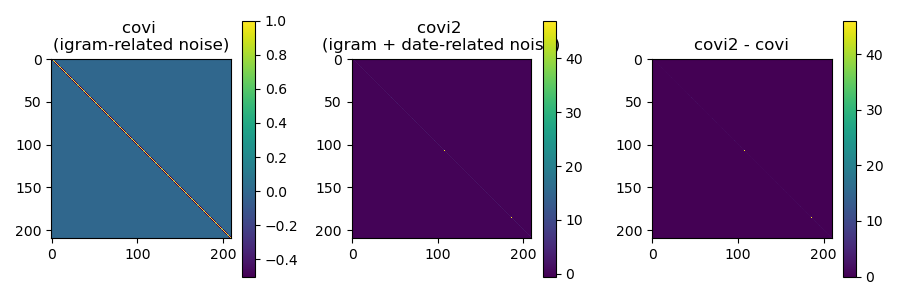

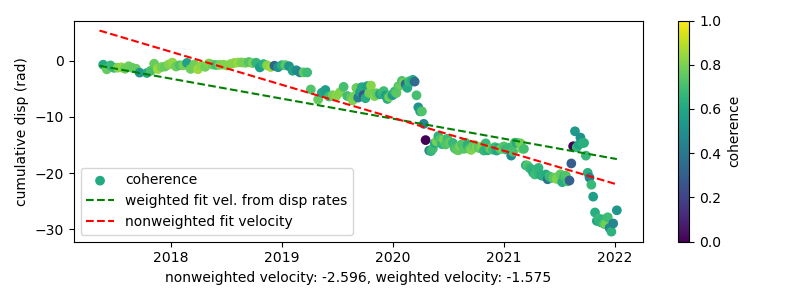

nonweighted velocity: 		-5.880861693094535 rad/yr 	-2.5957095402887274 cm/yr
weighted vel from disp rates: 	-3.567395512689606 rad/yr 	-1.5745860129893643 cm/yr
RMSE to weighted fit: 		0.9900569687731181 rad/yr 	0.43699383753427956 cm/yr


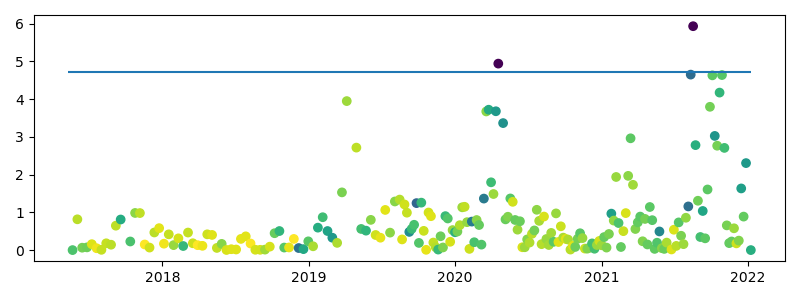

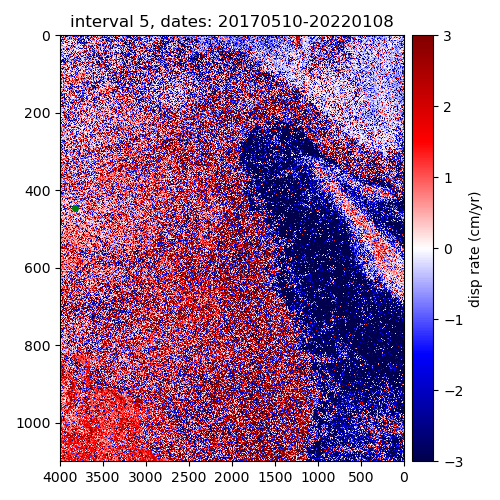

In [11]:
driver=gdal.GetDriverByName('ISCE')
# if testing with a large disp value with bad coherence, set this key to 'test'
key = 'notest'
# which interval?
j = 5

igramsDir =  '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/cropped_LS_with_western_mtns/'+key1+'_unwrapped/'
filtDir   =  '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/cropped_LS_with_western_mtns/filt_unwrapped/'
cohDir =     '/data/ocp4/LagunaSalada/Data_and_Figs/2_coherence/coh_LS_with_western_mtns_all_igrams/'
saveDir =    '/data/ocp4/LagunaSalada/Data_and_Figs/11_unwrapped_igrams/disp_rate_maps_with_western_mtns/'

# pick out indices from the interval (interval j)
interval_length = end_indices[j]-start_indices[j]
print(str(interval_length)+' dates in interval '+str(j)+'.')
# set up temp arrays for the row I'm extracting each time 
temp_phs = np.ndarray((interval_length,),dtype='float')
temp_coh = np.ndarray((interval_length,),dtype='float')
temp_filt= np.ndarray((interval_length,),dtype='float')

# load in phase values for single pixel, correct them (subtract avg ref value), load coherences for that row of pix
for i in range(interval_length):
    #print(start_indices[j]+i)
    date1 = dates[start_indices[j]+i]
    date2 = dates[start_indices[j]+i+1]
    igramFile = igramsDir+date1+'_'+date2+'_'+key1+'.unw'
    ds = gdal.Open(igramFile,gdal.GA_ReadOnly)
    # only reading in one row at a time 
    temp_phs[i] = ds.GetRasterBand(1).ReadAsArray(x,y,1,1)[0,0]      # (startx,starty,dx,dy)  
    # correct based on avg ref values and topography correction
    temp_phs[i] = temp_phs[i] - avg_ref_vals[start_indices[j]+i]
    # read in the same row of data for the filtered unwrapped igram 
    filtFile = filtDir+date1+'_'+date2+'_filt.unw'
    ds = gdal.Open(filtFile,gdal.GA_ReadOnly)
    temp_filt[i] = ds.GetRasterBand(1).ReadAsArray(x,y,1,1)[0,0] 
    # correct based on filt ref vals
    #temp_filt[i] = temp_filt[i] - filt_ref_vals[start_indices[j]+i]
    # NEVERMIND use the same ref phase val as the unfilt igram.
    temp_filt[i] = temp_filt[i] - avg_ref_vals[start_indices[j]+i]
    # load one line of coherence files
    cohFile = 'coh_'+date1+'-'+date2+'.r4'
    ds = gdal.Open(cohDir+cohFile, gdal.GA_ReadOnly)
    # only reading in one row at a time
    temp_coh[i] = ds.GetRasterBand(1).ReadAsArray(x,y,1,1)[0,0] 
# times of SLCs in interval j
t = slc_dates_floats[start_indices[j]:end_indices[j]+1]     # first index is starting SLC, end index+1 is end SLC
t_datetime = slc_dates[start_indices[j]:end_indices[j]+1]   # so igram dates are t[1::], this line is for better plotting
# print('t: ')
# print(t)
                                          # this is disp over igrams in interval, for the single pixel  
if key=='test':
    # OPTIONAL: make the Nth disp a HUGE number to test 
    disps[20] = -10.0

# Make d(data) matrix (change in displacement over each igram, referenced to avg value over entire igram)
# THIS IS HIGH-PASS PHASE
disps = temp_phs - temp_filt  
# print('disps:')
# print(disps)

# coherence at that pixel when disps are smaller than cutoff/threshold jump value 
coh_at_pixel = np.copy(temp_coh)
# print('coh at pixel:')
# print(coh_at_pixel)

# now artificially change the coherence at phase jumps > some threshold value reeeeally close to zero.
phs_jump_th = 1.5*np.pi #*(5/4)
bad_metric = np.zeros([interval_length,])
bad_metric[1:-1] = (2*disps[1:-1]+disps[0:-2]+disps[2:])/2
coh_at_pixel[np.abs(bad_metric)>phs_jump_th] = 0.0000000001

#coh_at_pixel[np.abs(disps)>phs_jump_th] = 0.0000000001

# count how many instances that the phase is larger than the threshold value 
num_phs_jumps = sum(1 for i in np.abs(bad_metric) if i>phs_jump_th)
print('Number of jumps excluded from inversion: '+str(num_phs_jumps))

variances = (-2*np.log(coh_at_pixel))                       # got this formula from Rowena's cor_sigma_test.m file 
if key=='test':
    # OPTIONAL: make the Nth variance a HUGE number to test 
    variances[20] = 100.0
vars_diag = np.diag(variances,0)


# this is date-related/atmospheric noise (instead of coherence/std.dev.s/variances which are speckle/igram-related)
noise_diags = np.ones(interval_length)                      # ones on diagonal 
noise_off_diags = np.ones(interval_length-1)*(-0.5)         # -0.5 on off diagonals

# date/atm-related noise covariance matrix
covi = np.diag(noise_diags,0)+np.diag(noise_off_diags,-1) \
    +np.diag(noise_off_diags,1) 

# Combine date-related and igram-related noise into proper covariance matrix 
covi2 = covi + vars_diag                                    # account for noise in individual igrams, ~speckle (not associated w/ a date, 2 igrams)
icov = np.linalg.inv(covi2)                                 # inverse of covariance matrix

covi2diags = np.diag(covi2)
# print('covi2 diagonals:')
# print(covi2diags)

# Calculate cumulative displacement to do simple polyfit for comparison with weighted fit.
cum_disps = np.hstack((0,np.cumsum(disps)))
# make G matrix with 1's and -1's 
G_diags = np.ones((interval_length-1))


Gint = np.diag(G_diags,1)-1*np.eye(interval_length)         # -1's along diagonal, 1's on upper off diagonal
# plot covariance matrices 
plt.figure(figsize=(9,3),tight_layout='TRUE')    
plt.subplot(1,3,1); plt.imshow(covi,interpolation='nearest') #,vmin=-0.5,vmax=1.6
plt.colorbar(); plt.title('covi \n(igram-related noise)')
plt.subplot(1,3,2); plt.imshow(covi2,interpolation='nearest')
plt.colorbar(); plt.title('covi2 \n(igram + date-related noise)')
plt.subplot(1,3,3); plt.imshow(covi2-covi,interpolation='nearest')
plt.colorbar(); plt.title('covi2 - covi'); plt.show() 
# calculate dt's (time intervals of each igram)
dt = np.diff(t.T)[0]                                        # the indices are weird from diff, the [0] index is actually the array we want.
# do inversion 
# USING DISP RATE (disp per igram) AND DT
G_disps = dt.reshape((interval_length,1))
Gg_disps_weighted = np.linalg.inv(G_disps.T.dot(icov).dot(G_disps)).dot(G_disps.T).dot(icov)
model_disp_rates = Gg_disps_weighted.dot(disps)             # weighted inversion directly from ints 
vel_disp_rate = model_disp_rates[0]                         # this just gives a velocity, no intercept 
# calculate a line from the weighted inversion for velocity, set intercept to zero.
line = vel_disp_rate*(t-t[0]) + 0.0
# make a conversion factor from radians to cm. 
wavelength = 5.5465763                                      # C-band, in cm 
rad2cm = wavelength/(4*np.pi)                               # this is conversion factor that I multiply by the data (which is in rads)
# a normal linear regression (to make sure weighted version is different)
m, b = np.polyfit(t.reshape((interval_length+1,)),cum_disps,1)
line_nonweighted = m*t+b

# plot cumulative displacements over the interval, colored by coherence. 
plt.figure(figsize=(8,3),tight_layout='TRUE')
#plt.plot(t_datetime,cum_disps,'k-'); plt.ylabel('rad')
plt.scatter(t_datetime[1::],cum_disps[1::],c=coh_at_pixel,vmin=0,vmax=1,label='coherence',cmap='viridis')
# need soemthing to align weighted disp rate with unweighted disp rate lines
offset = np.mean(line)-np.mean(line_nonweighted)
# plot the nonweighted vs. weighted fit lines 
plt.plot(t_datetime,line-offset,'g--',label='weighted fit vel. from disp rates')
plt.plot(t_datetime,line_nonweighted,'r--',label='nonweighted fit velocity')
plt.ylabel('cumulative disp (rad)'); plt.legend(); plt.colorbar(label='coherence')
plt.xlabel('nonweighted velocity: '+str(np.round(rad2cm*m,3))+', weighted velocity: '+str(np.round(rad2cm*vel_disp_rate,3)))
plt.show()
print('nonweighted velocity: \t\t'+str(m)+' rad/yr \t'+str(rad2cm*m)+' cm/yr')
#print('weighted velocity: \t\t'+str(vel_cum_disp)+' rad/yr \t'+str(rad2cm*vel_cum_disp)+' cm/yr')
print('weighted vel from disp rates: \t'+str(vel_disp_rate)+' rad/yr \t'+str(rad2cm*vel_disp_rate)+' cm/yr')
rmse = np.std(disps-vel_disp_rate)
print('RMSE to weighted fit: \t\t'+str(rmse)+' rad/yr \t'+str(rad2cm*rmse)+' cm/yr')

plt.figure(figsize=(8,3),tight_layout='TRUE')
plt.scatter(t_datetime[1::],abs(bad_metric),c=coh_at_pixel,label='bad metric',cmap='viridis')
plt.hlines(1.5*np.pi,t_datetime[0],t_datetime[-1])
plt.show()

# plot where that point is 
plt.figure(figsize=(5,5),tight_layout=True)
plt.imshow(disp_rates, aspect='auto', cmap='seismic',vmin=-3.0,vmax=3.0,\
            interpolation='nearest')
plt.colorbar(orientation='vertical',pad=0.02,label='disp rate (cm/yr)')
plt.plot(x,y,'g.',ms=8)
plt.xlim([dx,0]); plt.ylim([dy,0])
#plt.xticks([]); plt.yticks([])
plt.title('interval '+str(j)+', dates: '+str(dates[start_indices[j]])+'-'+str(dates[end_indices[j]]))
plt.show()

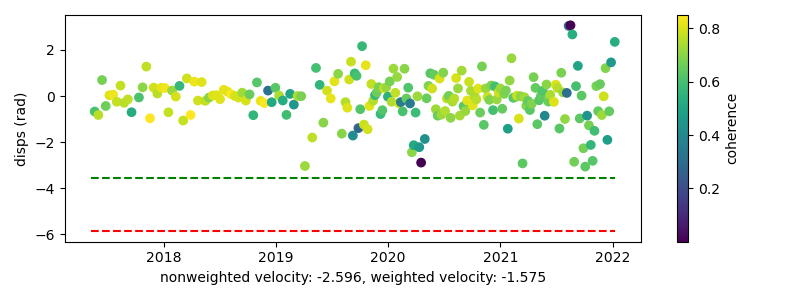

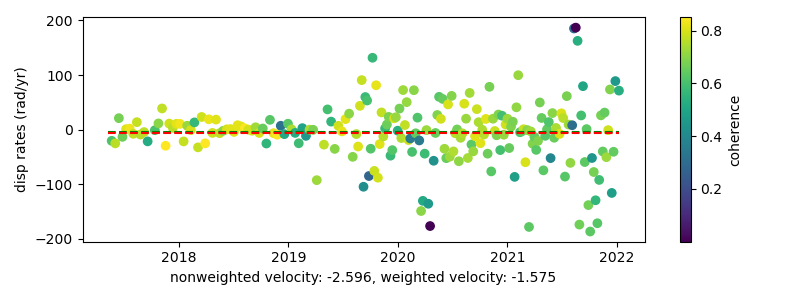

avg rate: -6.677521715168321


In [12]:
# plot displacements over the interval, colored by coherence. 
plt.figure(figsize=(8,3),tight_layout='TRUE')
#plt.plot(t_datetime,cum_disps,'k-'); plt.ylabel('rad')
plt.scatter(t_datetime[1::],disps,c=coh_at_pixel,label='coherence',cmap='viridis')
# need soemthing to align weighted disp rate with unweighted disp rate lines
offset = np.mean(line)-np.mean(line_nonweighted)
# plot the nonweighted vs. weighted fit lines 
plt.plot([t_datetime[0],t_datetime[-1]],[vel_disp_rate,vel_disp_rate],'g--',label='weighted fit vel. from disp rates')
plt.plot([t_datetime[0],t_datetime[-1]],[m,m],'r--',label='nonweighted fit velocity')
plt.ylabel('disps (rad)'); plt.colorbar(label='coherence')
plt.xlabel('nonweighted velocity: '+str(np.round(rad2cm*m,3))+', weighted velocity: '+str(np.round(rad2cm*vel_disp_rate,3)))
plt.show()


# plot displacements over the interval, colored by coherence. 
plt.figure(figsize=(8,3),tight_layout='TRUE')
#plt.plot(t_datetime,cum_disps,'k-'); plt.ylabel('rad')
plt.scatter(t_datetime[1::],disps/dt,c=coh_at_pixel,label='coherence',cmap='viridis')
# need soemthing to align weighted disp rate with unweighted disp rate lines
offset = np.mean(line)-np.mean(line_nonweighted)
# plot the nonweighted vs. weighted fit lines 
plt.plot([t_datetime[0],t_datetime[-1]],[vel_disp_rate,vel_disp_rate],'g--',label='weighted fit vel. from disp rates')
plt.plot([t_datetime[0],t_datetime[-1]],[m,m],'r--',label='nonweighted fit velocity')
plt.ylabel('disp rates (rad/yr)'); plt.colorbar(label='coherence')
plt.xlabel('nonweighted velocity: '+str(np.round(rad2cm*m,3))+', weighted velocity: '+str(np.round(rad2cm*vel_disp_rate,3)))
#plt.ylim([-10,10])
plt.show()

print('avg rate: '+str(np.mean(disps/dt)))

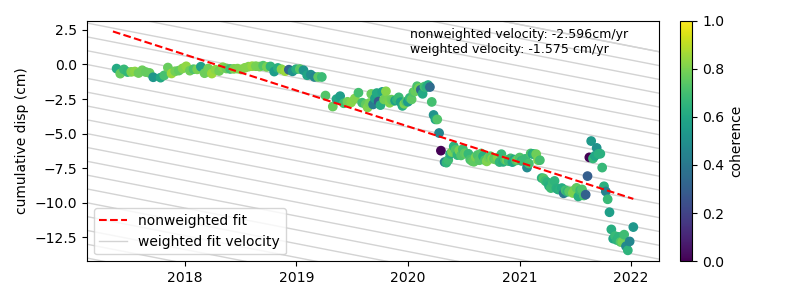

nonweighted velocity: 		-5.880861693094535 rad/yr 	-2.5957095402887274 cm/yr
weighted vel from disp rates: 	-3.567395512689606 rad/yr 	-1.5745860129893643 cm/yr
RMSE to weighted fit: 		0.9900569687731181 rad/yr 	0.43699383753427956 cm/yr


In [13]:
# plot cumulative displacements over the interval, colored by coherence. 
plt.figure(figsize=(8,3),tight_layout='TRUE')
#plt.plot(t_datetime,cum_disps,'k-'); plt.ylabel('rad')
plt.scatter(t_datetime[1::],cum_disps[1::]*rad2cm,c=coh_at_pixel,vmin=0,vmax=1)
plt.plot(t_datetime,line_nonweighted*rad2cm,'r--',label='nonweighted fit')
plt.ylabel('cumulative disp (cm)'); 
plt.colorbar(label='coherence',pad=0.03)
#plt.xlabel('nonweighted velocity: '+str(np.round(rad2cm*m,3))+', weighted velocity: '+str(np.round(rad2cm*vel_disp_rate,3)))
plt.text(t_datetime[-120],0.8,'nonweighted velocity: '+str(np.round(rad2cm*m,3))+'cm/yr \nweighted velocity: '+str(np.round(rad2cm*vel_disp_rate,3))+' cm/yr',size=9)
Ymin,Ymax = plt.ylim()
Xmin,Xmax = plt.xlim()

for u in range(30):
    intercept = -20 + u*1
    x_vals = [Xmin,Xmax]
    y_vals = [(intercept),(intercept+vel_disp_rate*rad2cm*(Xmax-Xmin)/365.25)]
    plt.plot(x_vals, y_vals, '-', linewidth=1, c='lightgray',zorder=0)
plt.plot(x_vals, y_vals, '-', linewidth=1, c='lightgray',zorder=0, label='weighted fit velocity')

plt.ylim([Ymin,Ymax]); plt.xlim([Xmin,Xmax])
plt.legend(loc='lower left')
plt.show()

print('nonweighted velocity: \t\t'+str(m)+' rad/yr \t'+str(rad2cm*m)+' cm/yr')
#print('weighted velocity: \t\t'+str(vel_cum_disp)+' rad/yr \t'+str(rad2cm*vel_cum_disp)+' cm/yr')
print('weighted vel from disp rates: \t'+str(vel_disp_rate)+' rad/yr \t'+str(rad2cm*vel_disp_rate)+' cm/yr')
rmse = np.std(disps-vel_disp_rate)
print('RMSE to weighted fit: \t\t'+str(rmse)+' rad/yr \t'+str(rad2cm*rmse)+' cm/yr')

In [14]:
#%%script echo skipping

driver=gdal.GetDriverByName('ISCE')

# set up final arrays of weighted velocities and RMSE/residual stds
disp_rates_weighted = np.ndarray((num_intervals,dy,dx),dtype='float') 
disp_rates_residual_std = np.ndarray((num_intervals,dy,dx),dtype='float')
num_wrap_errors = np.ndarray((num_intervals,dy,dx),dtype='float')

igramsDir =  '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/cropped_LS_with_western_mtns/'+key1+'_unwrapped/'
filtDir   =  '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/cropped_LS_with_western_mtns/filt_unwrapped/'
cohDir =     '/data/ocp4/LagunaSalada/Data_and_Figs/2_coherence/coh_LS_with_western_mtns_all_igrams/'
saveDir =    '/data/ocp4/LagunaSalada/Data_and_Figs/12_rate_inversions/disp_rate_maps_with_western_mtns/'
 
# set the cutoff value for what is considered unwrap error 
phs_jump_th = 1.5*np.pi 
 
# loop through intervals 
for j in np.arange(5,6,1): #range(num_intervals), range(1) will just do the first interval 
    # pick out indices from the interval (interval j)
    interval_length = end_indices[j]-start_indices[j]
    print(str(interval_length)+' dates in interval '+str(j)+'.')
    print(key1)

    # set up temp arrays for the row I'm extracting each time 
    temp_phs = np.ndarray((interval_length,dx),dtype='float')       # axis 0 is date/igram index, axis 1 is x coordinate
    temp_coh = np.ndarray((interval_length,dx),dtype='float')
    temp_filt = np.ndarray((interval_length,dx),dtype='float')

    # loop through rows
    for y in range(dy): # range(dy)
        # load in single row of phase values, correct them (subtract avg ref value), load coherences for that row of pix
        for i in range(interval_length):
            date1 = dates[start_indices[j]+i]
            date2 = dates[start_indices[j]+i+1]
            igramFile = igramsDir+date1+'_'+date2+'_'+key1+'.unw'
            ds = gdal.Open(igramFile,gdal.GA_ReadOnly)
            # only reading in one row at a time 
            temp_phs[i] = ds.GetRasterBand(1).ReadAsArray(0,y,dx,1)     # (startx,starty,dx,dy)  
            # correct based on avg ref values
            temp_phs[i] = temp_phs[i] - avg_ref_vals[start_indices[j]+i]
            # read in the same row of data for the filtered unwrapped igram 
            filtFile = filtDir+date1+'_'+date2+'_filt.unw'
            ds = gdal.Open(filtFile,gdal.GA_ReadOnly)
            temp_filt[i] = ds.GetRasterBand(1).ReadAsArray(0,y,dx,1) 
            # correct based on filt ref vals
            #temp_filt[i] = temp_filt[i] - filt_ref_vals[start_indices[j]+i]
            # NEVERMIND use the same ref phase val as the unfilt igram.
            temp_filt[i] = temp_filt[i] - avg_ref_vals[start_indices[j]+i]
            # load one line of coherence files
            cohFile = 'coh_'+date1+'-'+date2+'.r4'
            ds = gdal.Open(cohDir+cohFile, gdal.GA_ReadOnly)
            # only reading in one row at a time
            temp_coh[i] = ds.GetRasterBand(1).ReadAsArray(0,y,dx,1)
    
        # loop through pixels in that row and do weighted velocity inversion.
        for x in range(dx):   # dx for all pixels 
            t = slc_dates_floats[start_indices[j]:end_indices[j]+1]     # first index is starting SLC, end index+1 is end SLC
            t_datetime = slc_dates[start_indices[j]:end_indices[j]+1]   # so igram dates are t[1::], this line is for better plotting
            noise_diags = np.ones(interval_length)*1.0                  # ones on diagonal 
            noise_off_diags = np.ones(interval_length-1)*(-0.5)         # -0.5 on off diagonals
            covi = np.diag(noise_diags,0)+np.diag(noise_off_diags,-1) \
                +np.diag(noise_off_diags,1) 
            coh_at_pixel = temp_coh[:,x]                                # all dates, just the one pixel 
            
            # now artificially change the coherence at inflection points reeeeally close to zero.
            HP_phs = temp_phs[:,x] - temp_filt[:,x]
            bad_metric = np.zeros([interval_length,])
            bad_metric[1:-1] = (2*HP_phs[1:-1]+HP_phs[0:-2]+HP_phs[2:])/2
            coh_at_pixel[np.abs(bad_metric)>phs_jump_th] = 0.0000000001
            # count how many instances that the phase is larger than the threshold value 
            num_wrap_errors[j,y,x] = sum(1 for i in np.abs(bad_metric) if i>phs_jump_th)

            variances = (-2*np.log(coh_at_pixel))                       # got this formula from Rowena's cor_sigma_test.m file 
            vars_diag = np.diag(variances,0)
            covi2 = covi + vars_diag                                    # account for noise in individual igrams, ~speckle (not associated w/ a date, 2 igrams)
            icov = np.linalg.inv(covi2)                                 # inverse of covariance matrix
            disps = temp_phs[:,x]                                       # this is disp over igrams in interval, for the single pixel  
            G_diags = np.ones((interval_length-1))
            Gint = np.diag(G_diags,1)-1*np.eye(interval_length)         # -1's along diagonal, 1's on upper off diagonal
            dt = np.diff(t.T)[0]                                        # the indices are weird from diff, the [0] index is actually the array we want.
            G_disps = dt.reshape((interval_length,1))
            Gg_disps_weighted = np.linalg.inv(G_disps.T.dot(icov).dot(G_disps)).dot(G_disps.T).dot(icov)
            model_disp_rates = Gg_disps_weighted.dot(disps)             # weighted inversion directly from ints 
            vel_disp_rate = model_disp_rates[0]                         # this just gives a velocity, no intercept 
            disp_rates_weighted[j,y,x] = vel_disp_rate                  # leave it in radians! 
            disp_rates_residual_std[j,y,x] = np.std(disps-vel_disp_rate)

        # print an update if we've gotten through 100*n rows
        if(np.remainder(y,100)==0):
            print('Row '+str(y)+' weighted inversions done.')

    # now save the disp rate and rmse files
    fileName = 'interval_'+str(j)+'_'+key1+'_weighted_ref_to_'+key2+'_HP_phs_jump_cutoff.r4'
    #wrapErrFileName = 'interval_'+str(j)+'_'+key1+'_weighted_ref_to_'+key2+'_num_wrap_errs_v4.r4'
    # version 1 "interval...wrap_errs_removed.r4" is with threshold 2pi. 
    # version 2 "interval...wrap_errs_removed_v2.r4" is with threshold 1.5pi. 
    # version 3                                     is with reference pixel phase not smoothed before averaged and removed.
    # version 4 "interval...wrap_errs_removed_v4.r4" is with threshold 1.5pi, no topo correction, and just a plain avg of ref phs values removed.
    
    colds = driver.Create(saveDir+fileName,dx,dy,1,gdal.GDT_Float32)
    colds.GetRasterBand(1).WriteArray(disp_rates_weighted[j])
    colds=None
    # colds = driver.Create(saveDir+wrapErrFileName,dx,dy,1,gdal.GDT_Float32)
    # colds.GetRasterBand(1).WriteArray(num_wrap_errors[j])
    # colds=None
    print('disp rates for each pixel saved for interval '+str(j))
print('done!') 

210 dates in interval 5.
unfilt
Row 0 weighted inversions done.
Row 100 weighted inversions done.
Row 200 weighted inversions done.
Row 300 weighted inversions done.
Row 400 weighted inversions done.
Row 500 weighted inversions done.
Row 600 weighted inversions done.
Row 700 weighted inversions done.
Row 800 weighted inversions done.
Row 900 weighted inversions done.
Row 1000 weighted inversions done.
disp rates for each pixel saved for interval 5
done!


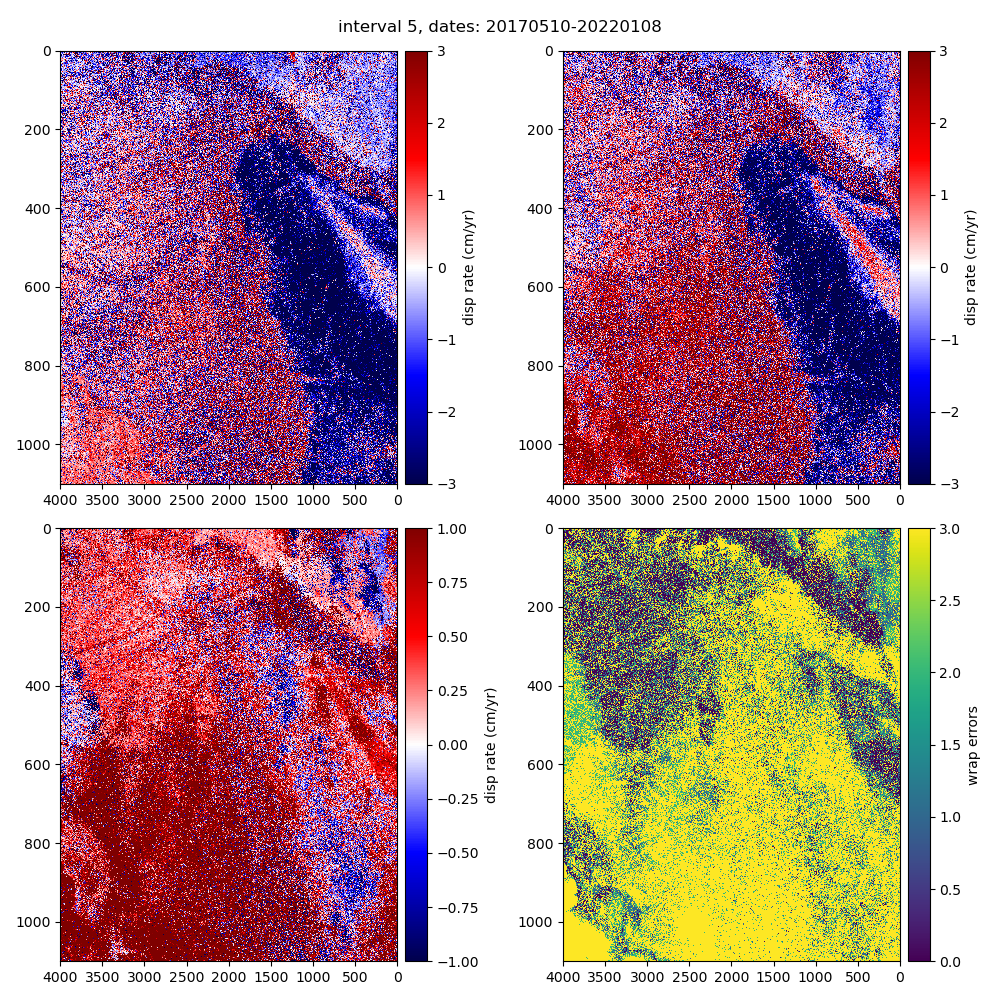

In [15]:
#%%script echo skipping
j=5
plt.figure(figsize=(10,10),tight_layout=True)
plt.subplot(2,2,1)
plt.imshow(disp_rates, aspect='auto', cmap='seismic',vmin=-3.0,vmax=3.0,\
            interpolation='nearest')
plt.colorbar(orientation='vertical',pad=0.02,label='disp rate (cm/yr)')
plt.xlim([dx,0]); plt.ylim([dy,0])
#plt.xticks([]); plt.yticks([])
plt.subplot(2,2,2)
plt.imshow(disp_rates_weighted[j], aspect='auto', cmap='seismic',vmin=-3.0,vmax=3.0,\
            interpolation='nearest')
plt.colorbar(orientation='vertical',pad=0.02,label='disp rate (cm/yr)')
plt.xlim([dx,0]); plt.ylim([dy,0])
plt.subplot(2,2,3)
plt.imshow(disp_rates_weighted[j]-disp_rates, aspect='auto', cmap='seismic',vmin=-1.0,vmax=1.0,\
            interpolation='nearest')
plt.colorbar(orientation='vertical',pad=0.02,label='disp rate (cm/yr)')
plt.xlim([dx,0]); plt.ylim([dy,0])
plt.subplot(2,2,4)
plt.imshow(num_wrap_errors[j], aspect='auto', cmap='viridis',vmin=0,vmax=3,\
            interpolation='nearest')
plt.colorbar(orientation='vertical',pad=0.02,label='wrap errors')
plt.xlim([dx,0]); plt.ylim([dy,0])
plt.suptitle('interval '+str(j)+', dates: '+str(dates[start_indices[j]])+'-'+str(dates[end_indices[j]]))
plt.show()

Read in the files if they aren't in memory from just having run it. 

In [14]:
# load the disp rate and rmse files
saveDir = '/data/ocp4/LagunaSalada/Data_and_Figs/12_rate_inversions/disp_rate_maps_with_western_mtns/'
fileName = 'interval_'+str(j)+'_'+key1+'_weighted_ref_to_'+key2+'_wrap_errs_removed_v4.r4'
wrapErrFileName = 'interval_'+str(j)+'_'+key1+'_weighted_ref_to_'+key2+'_num_wrap_errs_v4.r4'
disp_rates_weighted = np.ndarray((dy,dx),dtype='float') 
f1 = gdal.Open(saveDir+fileName, gdal.GA_ReadOnly)
disp_rates_weighted = f1.ReadAsArray()
f1 = None
print('interval '+str(j)+' disp rate map loaded.')

num_wrap_errors = np.ndarray((dy,dx),dtype='float') 
f1 = gdal.Open(saveDir+fileName, gdal.GA_ReadOnly)
num_wrap_errors = f1.ReadAsArray()
f1 = None
print('interval '+str(j)+' num wrap errors loaded.')

interval 5 disp rate map loaded.
interval 5 num wrap errors loaded.


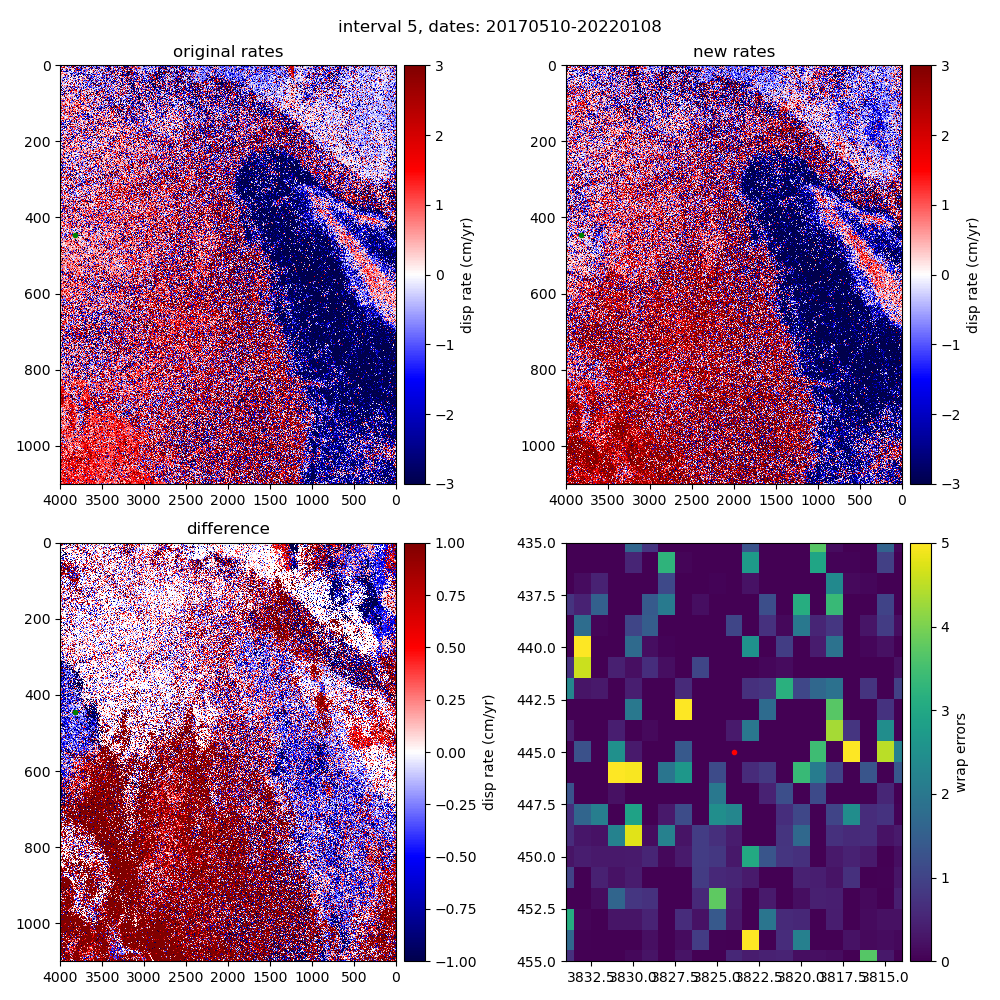

In [15]:
j=5
plt.figure(figsize=(10,10),tight_layout=True)
plt.subplot(2,2,1)
plt.imshow(disp_rates, aspect='auto', cmap='seismic',vmin=-3.0,vmax=3.0,\
            interpolation='nearest')
plt.colorbar(orientation='vertical',pad=0.02,label='disp rate (cm/yr)')
plt.xlim([dx,0]); plt.ylim([dy,0])
plt.plot(x,y,'g.')
plt.title('original rates')
#plt.xticks([]); plt.yticks([])
plt.subplot(2,2,2)
plt.imshow(disp_rates_weighted, aspect='auto', cmap='seismic',vmin=-3.0,vmax=3.0,\
            interpolation='nearest')
plt.colorbar(orientation='vertical',pad=0.02,label='disp rate (cm/yr)')
plt.xlim([dx,0]); plt.ylim([dy,0])
plt.plot(x,y,'g.')
plt.title('new rates')
plt.subplot(2,2,3)
plt.imshow(disp_rates_weighted-disp_rates, aspect='auto', cmap='seismic',vmin=-1.0,vmax=1.0,\
            interpolation='nearest')
plt.colorbar(orientation='vertical',pad=0.02,label='disp rate (cm/yr)')
plt.xlim([dx,0]); plt.ylim([dy,0])
plt.plot(x,y,'g.')
plt.title('difference')
plt.subplot(2,2,4)
plt.imshow(num_wrap_errors, aspect='auto', cmap='viridis',vmin=0,vmax=5,\
            interpolation='nearest')
plt.plot(x,y,'r.')
plt.colorbar(orientation='vertical',pad=0.02,label='wrap errors')
#plt.xlim([dx,0]); plt.ylim([dy,0])
plt.xlim([x+10,x-10]); plt.ylim([y+10,y-10])
plt.suptitle('interval '+str(j)+', dates: '+str(dates[start_indices[j]])+'-'+str(dates[end_indices[j]]))
plt.show()